<style type="text/css">

div.h2 {
    background-color: steelblue; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 24px; 
    max-width: 1500px; 
    margin-top: 50px;
    margin-bottom:4px;
}
    
body {
  font-size: 12px;
}    
     
                                    
                                      
div.h3 {
    color: #159957; 
    font-size: 18px; 
    margin-top: 20px; 
    margin-bottom:4px;
    text-decoration: underline;
}
   
                                      
div.h1 {
    background-color: steelblue; 
    color: white;
    padding: 8px; 
    padding-right: 300px; 
    font-size: 32px; 
    margin-top: 20px; 
    max-width: 1500px;
    margin-bottom: 8px;
}    
</style>    
 

<div class=h1>Analysing CTDS show- Views & Reach</div>

[Chai Time Data science show](https://chaitimedatascience.com/) is a podcast series hosted by [Sanyam Bhutani.](https://www.kaggle.com/init27).
This show features interviews researchers, practitioners and Kagglers in Data science community.

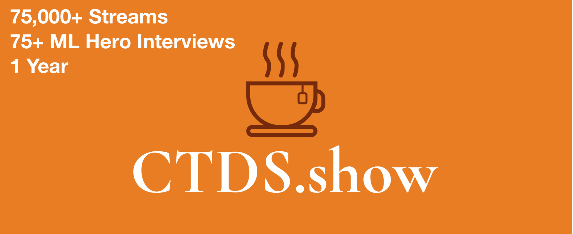

I personally have been watching Chai time data science show regularly. It has helped me a lot while learning new concepts & approaching practically new
problems with insights gained from this interviews.

<b>My Submission:</b> Following are parts of Kernels Submissions in order:<br>

<ul>
    <li><a href="https://www.kaggle.com/kurianbenoy/analysing-ctds-show-views-and-reach/" target="_blank">Part 1: Analysing CTDS show - views and reach </a>  </li>
    <li><a href="https://www.kaggle.com/kurianbenoy/understanding-the-ctds-host-sanyam-bhutani" target="_blank">Part 2: Understanding the CTDS host - Sanyam Bhutani</a>  </li>
</ul>

In this notebook we will be analysing how is the Chai time data science(CTDS) show featuring in major platforms in which it's available like Youtube,
Anchor, Spotify, Apple Podcast and other platforms. We will be looking how much has the CTDS.show reached throughout the community so far 

<hr>

<div class=h3> Summary</div>

> This report represents my analysis for this CTDS show competition. It is my opinion that based on the data provided, a few suggestions which can help us there:

>  - <i>Create small excrepts of interview series of about 5-10 minutes in Youtube.</i> Most of videos are having about average watch duration of 6-8 minutes.
>  - Current format suits mostly the audio streaming platforms as it's evident from having high average watch duration compared to youtube.
>  - About <i>64.5 percent of views of CTDS show in youtube</i> currently comes from non-impression views, due to external links. This truely show how community
driven podcast is the show.



<div class=h2>1. Importing Libraries  and looking data</div>

In [ ]:
!pip install pandas-bokeh
!pip install chart_studio
!pip install bar_chart_race

In [ ]:
import altair as alt
import bar_chart_race as bcr
import pandas as pd
import pandas_profiling 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
import chart_studio.plotly as py

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from plotly.offline import iplot

from pandas_profiling import ProfileReport

PLOT_BGCOLOR='#99ff66'

In [ ]:
episode = pd.read_csv('/kaggle/input/chai-time-data-science/Episodes.csv')
anchor_t = pd.read_csv('../input/chai-time-data-science/Anchor Thumbnail Types.csv')
yt_t = pd.read_csv('../input/chai-time-data-science/YouTube Thumbnail Types.csv')
eps_desc = pd.read_csv('/kaggle/input/chai-time-data-science/Description.csv')

<div class=h2> Artificial Intelligence podcast</div>

One of most prominent interview series with people in artifical intelligence is being run by Lex Fridman which titled Artificial Intelligence podcast . Let's briefly take a look at some it's reach and views:

- Artificial Intelligence podcast is being having 448K subscribers in youtube and is available in all the major audio platforms like Sptify, Google podcast, Apple podcast etc.
- Most of the time episodes feature bi-weekly on Mondays and Thursday, with a average youtube view of about 100K per episode.
- He create small clips usually 3-5 per episode, covering some important parts/questions of each episode.
- Lex started creating videos for his AI podcast from February 2, 2018 and has so far created 114 episodes in a span of more than 2 years.

<div class='h2'>2. Analysing CTDS Youtube channels</div>

The youtube channel has about 1800+ subscribers, with more than 85 videos released so far. Let's look at the some of the key metrics of this youtube channel. 
We will be looking how much has CTDS.show has reached the goal of reaching among the data science community in youtube. We will look which all heroes perform really well according to youtube metrics

<div class=h3> Number of videos released so far</div>

In [ ]:
print(episode.shape[0])

<div class=h3>How much content of CTDS has been consumed so far?</div>

- In a gist in a span of just under one year and with 85 videos and more. Sanyam channel has about 43K views, with more than a million impression and has been watched by as much as 180 days across by ML/Datascience enthusiast.

In [ ]:
episode['youtube_watch_hours'].sum()
hours = episode['youtube_watch_hours'].sum()
days = episode['youtube_watch_hours'].sum()/24
tot_views = episode['youtube_views'].sum()
tot_impressions = episode['youtube_impressions'].sum()

fig = go.Figure()

fig.add_trace(go.Indicator(
    title = 'Total Youtube Impressions',
    mode = "number",
    value = tot_impressions,
    domain = {'row': 0, 'column': 0}))


fig.add_trace(go.Indicator(
    title = "Total youtube views",
    mode = "number",
    value = tot_views,
    domain = {'row': 0, 'column': 1}))


fig.add_trace(go.Indicator(
    title = 'Total days of content watched',
    mode = "number",
    value = days,
    domain = {'row': 1, 'column': 0}))

fig.add_trace(go.Indicator(
    title = 'Total number of episodes',
    mode = "number",
    value = episode.shape[0],
    domain = {'row': 1, 'column': 1}))

fig.update_layout(width=700,height=400,title='<b>Chai Time Data Science Stats</b>',
                  template='seaborn',margin=dict(t=60,b=10,l=10,r=10),
                  grid = {'rows': 2, 'columns': 2, 'pattern': "independent"},paper_bgcolor=PLOT_BGCOLOR)

In [ ]:
ctd_pivot = pd.pivot_table(episode, index='release_date', values='youtube_views')
bcr.bar_chart_race(df = ctd_pivot, title = "Youtube views over time", cmap='dark12', figsize=(5, 3),)

<div class=h2> Important Youtube metrics</div>

<hr>

**Youtube Impressions:** Once your video is published, YouTube starts surfacing it to relevant audiences, based on their behavior on YouTube (like what they watch, don’t watch, what they search for, etc.). When a viewer comes across your video thumbnails on YouTube, it’s called impressions, that is, how many times your video thumbnails are shown on YouTube. Each impression can be a 
potential chance to earn a youtube view. Clicking on a link, embedding video on blogs, youtube notifications etc don't count as a impression.

**Youtube Non-Impressions views:** When a users doesn't see the full thumbnail and Title, it's counted as a Youtube Non-Impressions. However in this dataset it's defined as no of views from external sources compared to that internal sources.

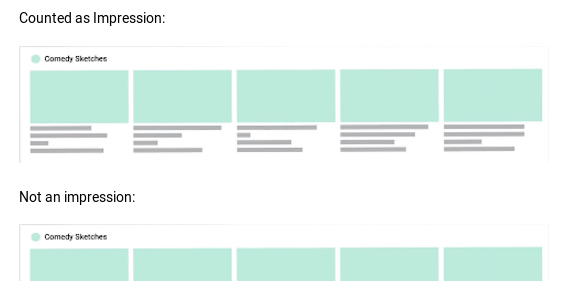

**Youtube views**: It counts the number of times a video has been watch so far. However youtube ensures a lot of checks to see if the views are coming from humans and not from bots. To learn
more about youtube views [check this out](https://qr.ae/pNKiNY)

**Youtube subscribers**: This is simple again, subscribers keep track of how many people have created alerts for your page, and these people would have your newest videos near the top of their feed. There are very few better ways to measure engagement than with subscribers. This means that somebody has not only taken their time to watch the video but they have gone a step further and checked what you offer and would like to continue seeing your videos. 

**Click through rate**: click-through rate shows you what percentage of your impressions on YouTube turned into views. This measures how often viewers watched a video after seeing an impression. Keep in mind, while some of your views come from impressions, some views might come from sources with no thumbnail impression, such as views from links shared outside of YouTube.

As your videos become more popular, they may get shown to a wider audience, and you may get more impressions. Since this audience may extend beyond your core viewers, your click-through rates may be lower, but don’t worry, you may still see an increase in overall views and watch time.

High CTR isn’t always a strong indicator of success. Be sure to look holistically at the content and conditions around that video. Look at Average view duration, Average percentage viewed to get a fuller picture of how well the video appeals to your audience. 

**youtube_watch_hours**: We all like to watch youtube, yet what youtube really cares is the amount of hours we watch various videos, so they can pump ads to billions of people. CTDS

**youtube_avg_watch_duration:** As the names suggests, it suggest amount of average time a user spends watching a youtube video.  Average watch duration is a indicator that the content is engaging to the user, and satisfies the purpose of person engaging with the content. A less average watch duration can be a indicator to change the format and style of content.

**youtube_subscribers:** The amount of people who likes the videos you make and tune into watch your episode frequently. They are the core supporters of channel and your intended audience of
the content you are making people engage into.

**youtube_comments:** This metric can be used for both quantitative and qualitative purposes. Quantitatively, comments are vitally important to see how people are choosing to comment, like, or embed your video.The high number of comments on your video suggests that the format, topic, or style has worked well and could possibly work well again on your next video. 

**youtube_likes:** Likes are like an upvote in Kaggle given as an appreciation for the content you produced. 

**youtube_dislikes**: Dislikes are just like downvotes as the content you produced may not appeal to all the users, and may not like certain aspects like video quality, youtuber who makes it etc.

<div class=h3> Most viewed Episodes</div>

In [ ]:
top_yt_views = episode.sort_values('youtube_views', ascending=False)[:15]

alt.Chart(top_yt_views).mark_bar().encode(
    x = 'youtube_views',
    y = alt.Y('heroes', sort='-x'),
    color='category'
).properties(height=400, width=500).configure_view(
    stroke='transparent'
)

<div class=h3> Most likes per videos</div>

In [ ]:
# youtube_likes
top_yt_like = episode.sort_values('youtube_likes', ascending=False)[:15]
alt.Chart(top_yt_like).mark_bar(color='green').encode(
    x = 'youtube_likes',
    y = alt.Y('heroes', sort='-x')
)

<div class=h3> Most dislikes per videos</div>

In [ ]:
top_yt_dislike = episode.sort_values('youtube_dislikes', ascending=False)[:15]
alt.Chart(top_yt_dislike).mark_bar(color='firebrick').encode(
    x = 'youtube_dislikes',
    y = alt.Y('heroes', sort='-x')
)

<div class=h3> Heroes who improved subscribers most?</div>

In [ ]:
top_yt_time = episode.sort_values('youtube_subscribers', ascending=False)[:15]
alt.Chart(top_yt_time).mark_bar().encode(
    x = 'youtube_subscribers',
    y = alt.Y('heroes', sort='-x')
)

<div class=h3> Most watched youtube video with watch hours</div>

In [ ]:

top_yt_time = episode.sort_values('youtube_watch_hours', ascending=False)[:15]
alt.Chart(top_yt_time).mark_bar().encode(
    x = 'youtube_watch_hours',
    y = alt.Y('heroes', sort='-x')
)

<div class=h3> Which video is being having best like vs dislike ratio</div>

In [ ]:
episode['overall_likes'] = (episode['youtube_dislikes']+1) / episode['youtube_likes']

In [ ]:
ctd_eps = episode[episode['episode_id'].str.match('E')]
ctd_eps = ctd_eps.drop([0])
top_yt_overall_like = ctd_eps.sort_values('overall_likes')[:15]
alt.Chart(top_yt_overall_like).mark_bar().encode(
    x = 'overall_likes',
    y = alt.Y('heroes', sort='-x')
)

- We have seen how various heroes have performed across various youtube metrics.
- Most of common youtube metrics like likes, dislikes, watch_hours and increase in subscribers are highly correlated, which is why heroes with high youtube views like Jeremy Howards, Parul Pandey, Giba, Abhishek Thakur comes in top of most of the bar charts.

<div class=h2> Average watch duration vs Episode duration in minutes</div>

In [ ]:
episode['avg_duration'] = episode['youtube_watch_hours']*60/ episode['youtube_views']

In [ ]:
top_yt_avg_time = episode.sort_values('avg_duration', ascending=False)[:15]
alt.Chart(top_yt_avg_time).mark_bar(color='green').encode(
    x = 'avg_duration',
    y = alt.Y('heroes',sort='-x')
)

In [ ]:
time_dur = episode[['release_date', 'avg_duration', 'episode_duration']]
time_dur['episode_duration'] = time_dur['episode_duration'] / 60
time_dur = time_dur.set_index('release_date')
bcr.bar_chart_race(df = time_dur, title = "Average watch duration per episode in minutes", cmap='prism', figsize=(5, 3),)

- It quite evident from the analysis, even the most viewed episodes have a avg_watch duration of about 6-9 minutes only. Whether it be a 40 minute video or an episode which can extend upto 2 hours
- It's quite important in this case to have shorter duration videos of like 8-15 minutes containing excerpts of some of the popular questions being asked

<div class=h2> Youtube views sources</div>

- From youtube views it pretty sure that most of the views are from non -impression views

In [ ]:
fig = go.Figure(data=[go.Pie(labels=['Youtube organic views','Views from other sources'],
                             values=[episode['youtube_views'].sum()-episode['youtube_nonimpression_views'].sum(), episode['youtube_nonimpression_views'].sum(),], 
                            pull=[0.2, 0])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  )
fig.show()

<div class=h3> How are subscribers growing, per episode</div>

In [ ]:
# X-axis is the release_date
# y-axis can be the growth of subscribers
alt.Chart(ctd_eps).mark_line().encode(
    x = 'episode_id',
    y = alt.Y('youtube_subscribers')
)


In [ ]:
ctd_eps['cum_youtube_views'] = ctd_eps['youtube_views'].cumsum()
fig = px.line(ctd_eps, x="episode_id", y="cum_youtube_views", title='Growth of youtube cumulative views across the episodes')
fig.show()

<div class=h3> What are youtube impression to youtube watch hours</div>

**Impressions:**  When a viewer comes across your video thumbnails on YouTube, it’s called impressions, that is, how many times your video thumbnails are shown on YouTube. Think of each impression as potential reach on YouTube and an opportunity to earn a view. 

**Impressions click-through rate(CTR)**: shows you what percentage of your impressions on YouTube turned into views. This measures how often viewers watched a video after seeing an impression. Keep in mind, while some of your views come from impressions, some views might come from sources with no thumbnail impression, such as views from links shared outside of YouTube.

<div class =h3> What was the impact of recent change in thumbnails  by Sanyanam?</div>


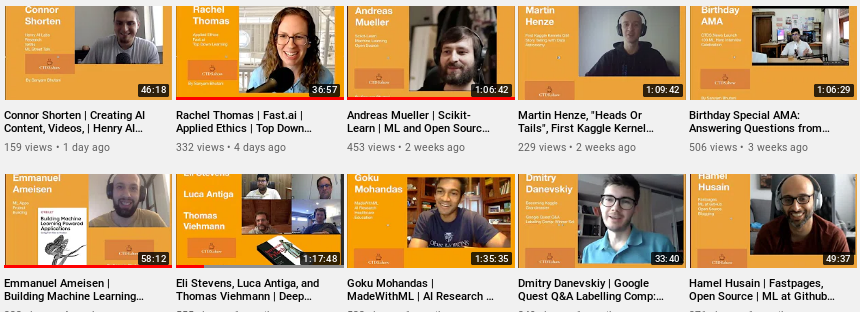

In [ ]:
latest_thumbnail = episode.iloc[69:]
latest_thumbnail['youtube_ctr'].mean()

In [ ]:
episode['youtube_ctr'].mean()

- avg CTR score improved with latest thumbnail details

In [ ]:
print("episode with max ctr", episode['youtube_ctr'].max())
episode[episode['youtube_ctr']==8.46]

<div class='h1'>3. Audio streaming platforms for CTDS show</div>

- CTDS is available in 9 audio platforms, the full list of platforms can be seen [here](https://anchor.fm/chaitimedatascience). Here Spotify and Apple podcasts only make 48% of the audio streaming traffic, the total audio streams at the time of publishing this are 40,598. (from Data Description)


<div class=h3> Podcast distribution percentage through each audio platforms</div>

In [ ]:
tot_aud = ctd_eps['anchor_plays'].sum()
spotify_tot = ctd_eps['spotify_starts'].sum() # No of episode which was played for >0 s
apple_tot = ctd_eps['apple_listeners'].sum()

In [ ]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['Spotify','Apple Podcast','Others'],
                             values=[spotify_tot, apple_tot,tot_aud-(spotify_tot+apple_tot)])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [ ]:
ctd_eps['spotify_starts'].sum()

In [ ]:
ctd_eps['spotify_streams'].sum()

- Approx. 3000 people in spotify stopped watching their episode before less than 1 minute. What maybe the reason why so many people are leaving before even listening 1 minute. It can be due to two plausible reasons according to my opinion:

a) The intro which takes 30 seconds before saying anything maybe a distraction

b) Spotify's recommendation engine is doing a terrible job

<div class=h3> Most played episodes in Anchor</div>

In [ ]:
top_yt_duration = episode.sort_values('anchor_plays', ascending=False)[:15]
alt.Chart(top_yt_duration).mark_bar(color='black').encode(
    x = 'anchor_plays',
    y = alt.Y('heroes', sort='-x')
)

<div class=h3> Most watched episodes in spotify</div>

In [ ]:
top_yt_duration = episode.sort_values('spotify_starts', ascending=False)[:15]
alt.Chart(top_yt_duration).mark_bar(color='green').encode(
    x = 'spotify_starts',
    y = alt.Y('heroes', sort='-x')
)

<div class=h3>Heroes with most active listeners in Spotify</div>

In [ ]:
top_yt_duration = episode.sort_values('spotify_listeners', ascending=False)[:15]
alt.Chart(top_yt_duration).mark_bar(color='red').encode(
    x = 'spotify_listeners',
    y = alt.Y('heroes', sort='-x')
)

<div class=h3> Spotify vs Apple listeners </div>

In [ ]:
apple_listeners = episode['apple_listeners'].sum()
spotify_listeners = episode['spotify_listeners'].sum()

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['Apple Listeners','Spotify Listeners'],
                             values=[apple_listeners, spotify_listeners])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

<div class=h2> Average listening duration in Apple podcast </div>

In [ ]:
apple_avg_listeners = episode[['release_date', 'apple_avg_listen_duration', 'episode_duration']]
apple_avg_listeners = apple_avg_listeners.set_index('release_date')
bcr.bar_chart_race(df = apple_avg_listeners, title = "Average episode watch duration in Apple podcast(s)",  figsize=(5, 3),)

## More analysis coming soon

[Youtube](https://www.youtube.com/channel/UCRjtBP-o5FbgRzX2BHQEFtQ)

[Anchor](https://anchor.fm/chaitimedatascience)

I really like watch liking episode of CTDS.show, so do watch and subscribe to this awesome interview series hosted by Sanyam Bhutani. Do check the above links to watch the episodes.

## References

- [1 little coder video bar chart race](https://www.youtube.com/watch?v=qThD1InmsuI)
- https://www.kaggle.com/parulpandey/how-to-explore-the-ctds-show-data/
- https://pbpython.com/altair-intro.html
- https://altair-viz.github.io/
- https://www.kaggle.com/bgmello/neural-networks-feature-engineering-for-the-win
- https://www.kaggle.com/tombresee/next-gen-eda